# Earthquakes and Tectonic Plate Boundaries

**Our goals for today:**
- Review topography and seafloor age.
- Load and visualize an earthquake catalog.
- Plot histograms of earthquake magnitude and depth.
- Think about these data in terms of plate tectonics.

Read Chapter 3 of PyEarth, https://maggieavery.github.io/PyEarth_EPS88_jupyterbook/week_03.html

### Setup

Run this cell as it is to setup your environment.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

from cartopy import config
import cartopy.crs as ccrs

## Review topography looking at North Atlantic
Let's read in and plot the topography files that we used last week. Remember about **relative paths**, which is where the file is relative to you. 

We used files that were in `week02_IO_elevation/data`. 

We can use `pwd` to see where we are.

In [2]:
pwd

'/home/jupyter-bmarosites/week03_visual_seismo'

To get to `week02_IO_elevation` from where we are in `week03_visual_seismo`, we have to go **up** one directory, then in to `week02_IO_elevation`.

To go **up** we  use `../`

<font color=goldenrod>**_Code for you to write_**</font>

Try putting together a path that, from our `pwd` goes:
- up one
- into `week02_IO_elevation/data`
- specifies file `etopo20lats.txt`
- uses `np.loadtxt` to read in data into variable `lats`

In [3]:
import os

In [4]:
os.listdir('../')

['.bashrc',
 'week01_intro_map',
 '.cache',
 '.jupyter',
 'week02_IO_elevation',
 '.bash_logout',
 'week03_visual_seismo',
 '.local',
 'week01a_pandas',
 '.ipython',
 '.profile',
 '.config']

In [5]:
#Read in file etopo20lats.txt
topo_dir = '../week02_IO_elevation/data'
lats_file = topo_dir+'/'+'etopo20lats.txt'
lats = np.loadtxt(lats_file)
#To check that it worked correctly, print the contents
print(lats)

[-89.8333333 -89.5       -89.1666667 -88.8333334 -88.5000001 -88.1666668
 -87.8333335 -87.5000002 -87.1666669 -86.8333336 -86.5000003 -86.166667
 -85.8333337 -85.5000004 -85.1666671 -84.8333338 -84.5000005 -84.1666672
 -83.8333339 -83.5000006 -83.1666673 -82.833334  -82.5000007 -82.1666674
 -81.8333341 -81.5000008 -81.1666675 -80.8333342 -80.5000009 -80.1666676
 -79.8333343 -79.500001  -79.1666677 -78.8333344 -78.5000011 -78.1666678
 -77.8333345 -77.5000012 -77.1666679 -76.8333346 -76.5000013 -76.166668
 -75.8333347 -75.5000014 -75.1666681 -74.8333348 -74.5000015 -74.1666682
 -73.8333349 -73.5000016 -73.1666683 -72.833335  -72.5000017 -72.1666684
 -71.8333351 -71.5000018 -71.1666685 -70.8333352 -70.5000019 -70.1666686
 -69.8333353 -69.500002  -69.1666687 -68.8333354 -68.5000021 -68.1666688
 -67.8333355 -67.5000022 -67.1666689 -66.8333356 -66.5000023 -66.166669
 -65.8333357 -65.5000024 -65.1666691 -64.8333358 -64.5000025 -64.1666692
 -63.8333359 -63.5000026 -63.1666693 -62.833336  -62.5

<font color=goldenrod>**_Code for you to write_**</font>

What's the shape of lats?

In [6]:
lats.shape

(540,)

In [7]:
np.shape(lats)

(540,)

<font color=goldenrod>**_Code for you to write_**</font>

Now lets read in `etopo20lons.txt` and save it as `lons` and read in `etopo20data.txt` and save it as `topo_grid`. 

Then check their shapes.


In [8]:
lons_file = topo_dir+'/'+'etopo20lons.txt'
lons = np.loadtxt(lons_file)
print(lons.shape)
data_file = topo_dir+'/'+'etopo20data.txt'
topo_grid = np.loadtxt(data_file)
print(topo_grid.shape)

(1081,)
(540, 1081)


We want to plot the data as a contour map. Let's look again at what `plt.contourf` requires as inputs by using the docstring

<font color=goldenrod>**_Code for you to write_**</font>

In [9]:
plt.contourf?

Signature: plt.contourf(*args, data=None, **kwargs) -> 'QuadContourSet'
Docstring:
Plot filled contours.

Call signature::

    contourf([X, Y,] Z, /, [levels], **kwargs)

The arguments *X*, *Y*, *Z* are positional-only.

`.contour` and `.contourf` draw contour lines and filled contours,
respectively.  Except as noted, function signatures and return values
are the same for both versions.

Parameters
----------
X, Y : array-like, optional
    The coordinates of the values in *Z*.

    *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
    created via `numpy.meshgrid`), or they must both be 1-D such
    that ``len(X) == N`` is the number of columns in *Z* and
    ``len(Y) == M`` is the number of rows in *Z*.

    *X* and *Y* must both be ordered monotonically.

    If not given, they are assumed to be integer indices, i.e.
    ``X = range(N)``, ``Y = range(M)``.

Z : (M, N) array-like
    The height values over which the contour is drawn.  Color-mapping is
    controlled by *cm

The docstring says:

`*X* and *Y* must both be 2D with the same shape as *Z*`

Which is why we have to shape the arrays. `contourf` would accept the 2-dimensional array `lat_grid` as an input, but it wouldn't accept the 1-dimensional `lat` as an input.
    


<font color=goldenrod>**_Code for you to write_**</font>

Use `np.meshgrid` to create variables `lon2d_grid` and `lat2d_grid` that match the shape of `topo_grid`. Use `np.shape` to confirm this.

In [10]:
lon2d_grid, lat2d_grid = np.meshgrid(lons, lats)

Now, we can plot the 2-dimensional topography arrays with `contourf`.

Let us use the `Robinson` projection to look at the large underwater mountain range of the Mid-Atlantic ridge.

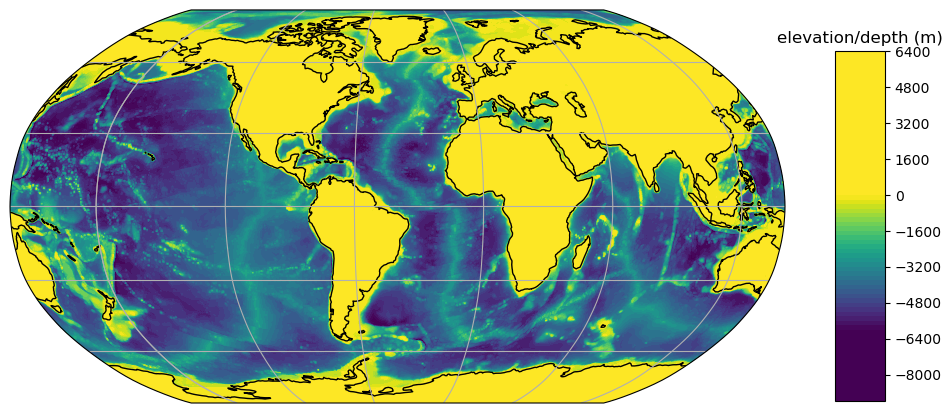

In [11]:
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-40.0))
ax.set_global()
plt.contourf(lon2d_grid, lat2d_grid, topo_grid,100,vmax=0,vmin=-6000,
             cmap=cm.viridis,transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

color_ax = plt.axes([0.95, 0.3, 0.05, 0.35])
plt.colorbar(cax=color_ax) 
plt.title('elevation/depth (m)'); 

plt.show()

## Review seafloor age looking at North Atlantic

Now let's do the same, but starting using as raw csv file.

Our goal is to plot the data as a contour map, like above. This means we're going to need to:
 - read in the data
 - save it to variables
 - determine the shape
 - convert it to three 2D meshes of lat, lon, and seafloor age
 - plot using contourf

<font color=goldenrod>**_Code for you to write_**</font>
We can use `pd.read_csv` to read in the `age.csv` file that again is in `week02_IO_elevation/data`.

In [12]:
seafloor_age_data = pd.read_csv('../week02_IO_elevation/data/age.csv')

#Print out to check the contents
print (seafloor_age_data.head())
print(seafloor_age_data.shape)

   longitude  latitude  age_Ma
0     -180.0      90.0  55.569
1     -179.8      90.0  55.568
2     -179.6      90.0  55.568
3     -179.4      90.0  55.569
4     -179.2      90.0  55.569
(1622701, 3)


<font color=goldenrod>**_Code for you to write_**</font>

Access the contents of each column, `longitude`, `latitude`, and `age_Ma`, apply `np.asarray` to convert them to numpy arrays, and save them to appropriately named variables.

In [13]:
lon = np.asarray(seafloor_age_data['longitude'])
lat = np.asarray(seafloor_age_data['latitude'])
age = np.asarray(seafloor_age_data['age_Ma'])

<font color=goldenrod>**_Code for you to write_**</font>

Determine the current shape of the arrays. Use `np.max` and `np.min` to figure out what range of values these arrays cover.

In [14]:
for arr in [lon, lat, age]:
    print(np.shape(arr))
    print(np.min(arr))
    print(np.max(arr))

(1622701,)
-180.0
180.0
(1622701,)
-90.0
90.0
(1622701,)
nan
nan


<font color=goldenrod>**_Code for you to write_**</font>

We need to create 2D arrays that cover longitudes from -180 to +180, and latitudes from -90 to 90. 
    
We can use `np.reshape` to do this, but we need to pass **arguments** of the number of latitudes and longitues to reshape the file to as `variable.reshape((number of latitudes, number of longitudes))`. Look at the spacing of the latitude values to work out how many lats and lons we need to tell `np.reshape` to make.

<font color=goldenrod>**_Code for you to write_**</font>
Reshape `age`, `longitude`, and `latitude` to 2D arrays of lats and lons.

In [15]:
print((180--180)*5+1)
print((90--90)*5+1)

1801
901


In [16]:
seafloor_age_data['longitude'].unique()

array([-180. , -179.8, -179.6, ...,  179.6,  179.8,  180. ], shape=(1801,))

In [17]:
(len(lon))/5/360

901.5005555555556

In [18]:
print(lon)
print(len(lon))

[-180.  -179.8 -179.6 ...  179.6  179.8  180. ]
1622701


In [19]:
long_grid = lon.reshape((901,1801))
lat_grid = lat.reshape((901,1801))
age_grid = age.reshape((901,1801))

<font color=goldenrod>**_Code for you to write_**</font>

Now plot the sea floor age.

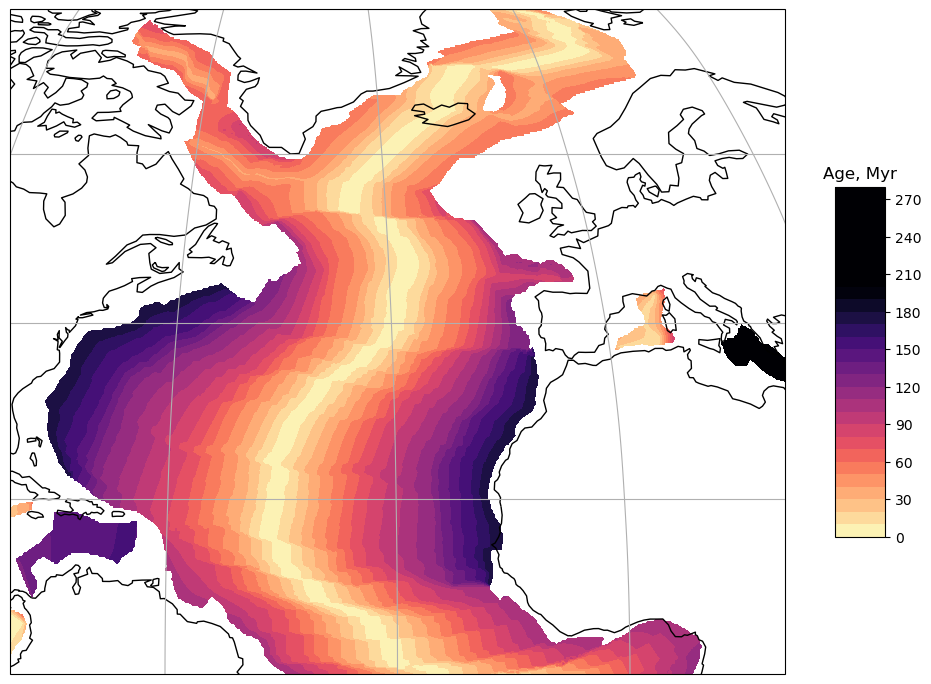

In [20]:
plt.figure(1,(10,10))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-40.0))
#ax.set_global()
ax.set_extent([-80, 20, 0, 80], crs=ccrs.PlateCarree())
plt.contourf(long_grid,lat_grid,age_grid,30,
             cmap=cm.magma_r,vmax=200,transform=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

color_ax = plt.axes([0.95, 0.3, 0.05, 0.35])
plt.colorbar(cax=color_ax) 
plt.title('Age, Myr'); 

plt.show()

What patterns do you observe? Where is the youngest seafloor in relation to the seafloor ridges we observed in our map of topography? Where is the oldest seafloor? 

## Load the Earthquake Catalog

Go to https://earthquake.usgs.gov/earthquakes/search/

Download a .csv data file of all the earthquakes of magnitude 5.0 and higher from the past 10 years. To get a .csv, rather than a map, click on output options. 

Alternatively, you could use the USGS API to access the data as we did in the first in-class period by modifying this URL with the right dates of '2015-09-01' to '2025-08-31':
https://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2010-09-15%2000:00:00&endtime=2020-09-14%2023:59:59&minmagnitude=4.5&orderby=magnitude

<font color=goldenrod>**_Code for you to write_**</font>

In [21]:
start_day = '2015-09-01'
end_day = '2025-08-31'
min_magnitude = '5'
standard_url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&orderby=magnitude'

query_url = standard_url + '&starttime=' + start_day + '&endtime=' + end_day + '&minmagnitude=' + min_magnitude
EQ_data = pd.read_csv(query_url)
EQ_data.head()

time  latitude  longitude   depth  mag magType    nst  \
0  2025-07-29T23:24:52.480Z   52.4980   160.2637   35.00  8.8     mww  251.0   
1  2015-09-16T22:54:32.860Z  -31.5729   -71.6744   22.44  8.3     mww    NaN   
2  2021-07-29T06:15:49.188Z   55.3635  -157.8876   35.00  8.2     mww    NaN   
3  2018-08-19T00:19:40.670Z  -18.1125  -178.1530  600.00  8.2     mww    NaN   
4  2017-09-08T04:49:19.180Z   15.0222   -93.8993   47.39  8.2     mww    NaN   

    gap   dmin   rms  ...                   updated  \
0  30.0  1.113  0.77  ...  2025-09-02T19:36:55.130Z   
1  19.0  0.684  1.02  ...  2025-08-21T23:16:18.163Z   
2   NaN    NaN  0.95  ...  2025-07-03T00:44:30.948Z   
3  13.0  3.630  0.79  ...  2023-07-04T05:45:52.658Z   
4  22.0  0.944  1.22  ...  2025-08-09T01:08:31.153Z   

                                         place        type horizontalError  \
0  2025 Kamchatka Peninsula, Russia Earthquake  earthquake            7.62   
1                    48 km W of Illapel, Chile  earthquake            4.70   
2                             Alaska Peninsula  earthquake             NaN   
3                     267 km E of Levuka, Fiji  earthquake            9.60   
4          2017 Tehuantepec, Mexico Earthquake  earthquake            6.20   

  depthError  magError  magNst    status  locationSource magSource  
0      1.805     0.018   303.0  reviewed              us        us  
1      3.200       NaN     NaN  reviewed              us        us  
2      0.000       NaN     NaN  reviewed              ak        ak  
3      1.900     0.045    47.0  reviewed              us        us  
4      3.700     0.058    29.0  reviewed              us        us  

[5 rows x 22 columns]

Recall from the homework that Pandas dataframe columns can be accessed using bracket notation with the name of the column as a string:

<font color=goldenrod>**_Code for you to write_**</font>

Show column `mag` and use `np.max` to find the maximum value

In [22]:
EQ_data['mag'].max()

np.float64(8.8)

### Determining when and where the largest Earthquake happened

To determine when this earthquake happened we need to find the data associated with this magnitude event. Pandas has really nice filtering functions built in. They take a while to get comfortable with, but can help us answer this question. 

Define a variable `largest_magnitude` that is the largest magnitude and then execute the cell below to get the date and time.

<font color=goldenrod>**_Code for you to write_**</font>

In [23]:

# EQ_data['mag'] == largest_magnitude
largest_magnitude = EQ_data[EQ_data['mag'] == EQ_data['mag'].max()]
print(largest_magnitude)

                       time  latitude  longitude  depth  mag magType    nst  \
0  2025-07-29T23:24:52.480Z    52.498   160.2637   35.0  8.8     mww  251.0   

    gap   dmin   rms  ...                   updated  \
0  30.0  1.113  0.77  ...  2025-09-02T19:36:55.130Z   

                                         place        type horizontalError  \
0  2025 Kamchatka Peninsula, Russia Earthquake  earthquake            7.62   

  depthError  magError  magNst    status  locationSource magSource  
0      1.805     0.018   303.0  reviewed              us        us  

[1 rows x 22 columns]


In [24]:
largest_magnitude = np.max(EQ_data['mag'])
print(largest_magnitude)

8.8


Now we can use the boolean expression `==` to show us where it is `True` that the earthquake magnitude is equal to the maximum magnitude

<font color=goldenrod>**_Code for you to write_**</font>

In [25]:
EQ_data['mag']==largest_magnitude

0         True
1        False
2        False
3        False
4        False
         ...  
17346    False
17347    False
17348    False
17349    False
17350    False
Name: mag, Length: 17351, dtype: bool

Then we can use this **mask** of `True` and `False` values to select from data frame `EQ_data` the rows where the magnitude is equal to this magnitude with `[ ]`

<font color=goldenrod>**_Code for you to write_**</font>

Mask the `EQ_data` array using the boolean mask you created above. 

Remember that the syntax is: 
`dataframe[mask]`

In [26]:
EQ_data[EQ_data['mag']==largest_magnitude]

time  latitude  longitude  depth  mag magType    nst  \
0  2025-07-29T23:24:52.480Z    52.498   160.2637   35.0  8.8     mww  251.0   

    gap   dmin   rms  ...                   updated  \
0  30.0  1.113  0.77  ...  2025-09-02T19:36:55.130Z   

                                         place        type horizontalError  \
0  2025 Kamchatka Peninsula, Russia Earthquake  earthquake            7.62   

  depthError  magError  magNst    status  locationSource magSource  
0      1.805     0.018   303.0  reviewed              us        us  

[1 rows x 22 columns]

And from this output we can show only the `time` column to give us the date of the largest earthquake.

In [27]:
largest_eq_date = EQ_data['time'][EQ_data['mag'] == largest_magnitude]
print(largest_eq_date)

0    2025-07-29T23:24:52.480Z
Name: time, dtype: object


To determine where the earthquake happened we can use similar filtering. Replace the `___` with a conditional statement to get the latitude and longitude:

<font color=goldenrod>**_Code for you to write_**</font>

In [28]:
largest_eq_lat_lon = EQ_data[['latitude','longitude', 'mag']][EQ_data['mag']==largest_magnitude]
print(largest_eq_lat_lon)

   latitude  longitude  mag
0    52.498   160.2637  8.8


Let's plot a red square at the location of the largest earthquake in our catalog. To the `plt.scatter` function, add `s=100` to adjust the size of the marker. Add `color='red'` to change the color. Add `marker='s'` to make it a square. 

Colors can be specified as detailed here: https://matplotlib.org/2.0.2/api/colors_api.html (html color names work: https://www.w3schools.com/colors/colors_names.asp).

Marker options are:
```
markers = {'.': 'point', ',': 'pixel', 'o': 'circle', 'v': 'triangle_down', '^': 'triangle_up', '<': 'triangle_left', '>': 'triangle_right', '1': 'tri_down', '2': 'tri_up', '3': 'tri_left', '4': 'tri_right', '8': 'octagon', 's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1', 'H': 'hexagon2', '+': 'plus', 'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline', '_': 'hline', 'P': 'plus_filled', 'X': 'x_filled', 0: 'tickleft', 1: 'tickright', 2: 'tickup', 3: 'tickdown', 4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown', 8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase', 'None': 'nothing', None: 'nothing', ' ': 'nothing', '': 'nothing'}
```

<font color=goldenrod>**_Code for you to write_**</font>

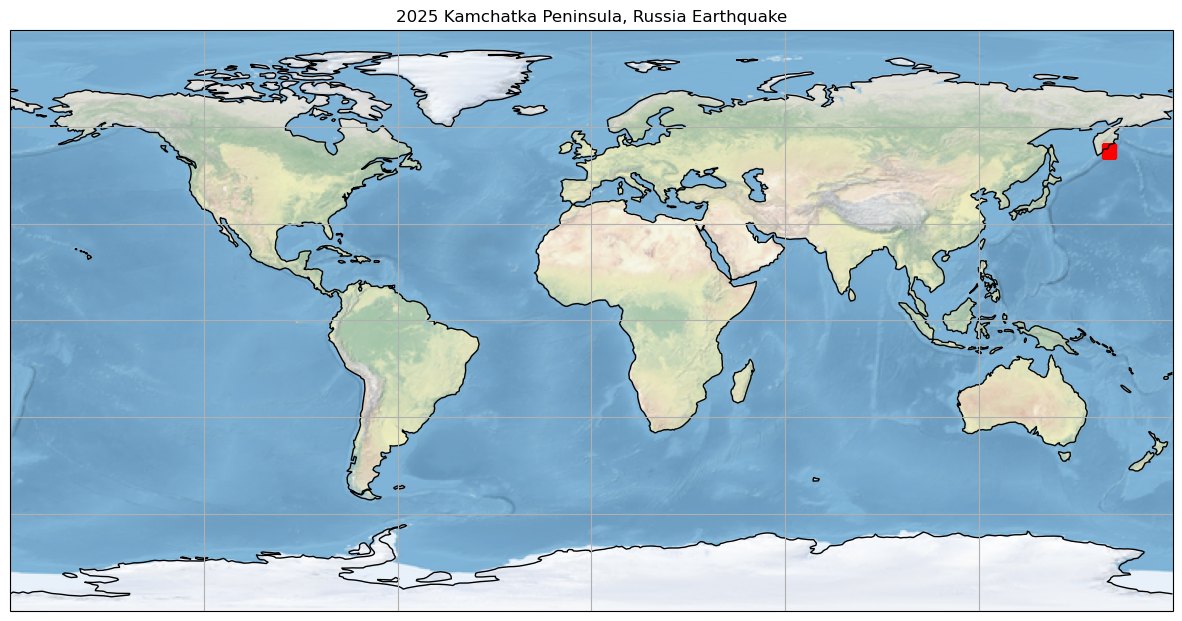

In [29]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

plt.scatter(largest_eq_lat_lon['longitude'],largest_eq_lat_lon['latitude'],color='red',marker='s',s=100,transform=ccrs.PlateCarree())

plt.title('2025 Kamchatka Peninsula, Russia Earthquake')
ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

<font color=darkred>**_Discussion question:_**</font> *What were the effects of this earthquake?*

https://www.youtube.com/watch?v=34zTrUPFeiI


## Plot histogram of Earthquake Magnitude

How often do large earthquakes occur? To start addressing this question, let's plot a histogram of earthquake magnitudes.

You have made a histogram before (such as in class last week) so go and ahead and write the code to make one in the cell below that plots up the `EQ_data['mag']`.

<font color=goldenrod>**_Code for you to write_**</font>

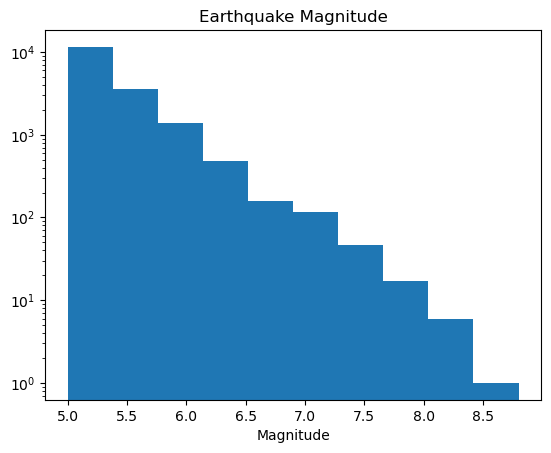

In [30]:
plt.hist(EQ_data['mag'])
plt.title('Earthquake Magnitude')
plt.xlabel('Magnitude')
plt.yscale('log')
plt.show()

There are so many small earthquakes that we can't even see a bin for the Illapel quake. Let's make the histogram on a log-scale. For any function, we can put a question mark after it to get its docstring. Let's do this for `plt.hist`. Once you execute the cell below, you will see that there are a lot of options (which you can also view here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). One of the options is to make the plot be on a log scale by setting `log=True`.

In [31]:
plt.hist?

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    *,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

**_Make a histogram of the Earthquake magnitude data on a log-scale_** 

Set `log=True` within the `plt.hist` function.

<font color=goldenrod>**_Code for you to write_**</font>

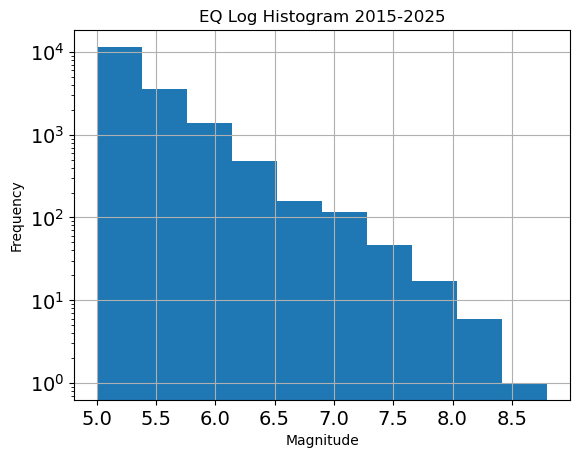

In [32]:
plt.hist(EQ_data['mag'], log=True, label='mag')
plt.title('EQ Log Histogram 2015-2025')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')
# plt.bin()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

Let's learn about some plotting options so that we can change the features of the plot from the defaults to improve our figure.

In [33]:
plt.grid?

Signature:
plt.grid(
    visible: 'bool | None' = None,
    which: "Literal['major', 'minor', 'both']" = 'major',
    axis: "Literal['both', 'x', 'y']" = 'both',
    **kwargs,
) -> 'None'
Docstring:
Configure the grid lines.

Parameters
----------
visible : bool or None, optional
    Whether to show the grid lines.  If any *kwargs* are supplied, it
    is assumed you want the grid on and *visible* will be set to True.

    If *visible* is *None* and there are no *kwargs*, this toggles the
    visibility of the lines.

which : {'major', 'minor', 'both'}, optional
    The grid lines to apply the changes on.

axis : {'both', 'x', 'y'}, optional
    The axis to apply the changes on.

**kwargs : `~matplotlib.lines.Line2D` properties
    Define the line properties of the grid, e.g.::

        grid(color='r', linestyle='-', linewidth=2)

    Valid keyword arguments are:

    Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n

In [34]:
plt.xticks?

Signature:
plt.xticks(
    ticks: 'ArrayLike | None' = None,
    labels: 'Sequence[str] | None' = None,
    *,
    minor: 'bool' = False,
    **kwargs,
) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'
Docstring:
Get or set the current tick locations and labels of the x-axis.

Pass no arguments to return the current values without modifying them.

Parameters
----------
ticks : array-like, optional
    The list of xtick locations.  Passing an empty list removes all xticks.
labels : array-like, optional
    The labels to place at the given *ticks* locations.  This argument can
    only be passed if *ticks* is passed as well.
minor : bool, default: False
    If ``False``, get/set the major ticks/labels; if ``True``, the minor
    ticks/labels.
**kwargs
    `.Text` properties can be used to control the appearance of the labels.

    .. warning::

        This only sets the properties of the current ticks, which is
        only sufficient if you either pass *ticks*, resulting in a
        f

In [35]:
plt.yticks?

Signature:
plt.yticks(
    ticks: 'ArrayLike | None' = None,
    labels: 'Sequence[str] | None' = None,
    *,
    minor: 'bool' = False,
    **kwargs,
) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'
Docstring:
Get or set the current tick locations and labels of the y-axis.

Pass no arguments to return the current values without modifying them.

Parameters
----------
ticks : array-like, optional
    The list of ytick locations.  Passing an empty list removes all yticks.
labels : array-like, optional
    The labels to place at the given *ticks* locations.  This argument can
    only be passed if *ticks* is passed as well.
minor : bool, default: False
    If ``False``, get/set the major ticks/labels; if ``True``, the minor
    ticks/labels.
**kwargs
    `.Text` properties can be used to control the appearance of the labels.

    .. warning::

        This only sets the properties of the current ticks, which is
        only sufficient if you either pass *ticks*, resulting in a
        f

And let's change our figure.

<font color=goldenrod>**_Code for you to write_**</font>

In [36]:
bin_width=10
bin_list = np.linspace(5, 9, 9)
print(bin_list)



[5.  5.5 6.  6.5 7.  7.5 8.  8.5 9. ]


[5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.   7.25 7.5  7.75 8.   8.25
 8.5  8.75 9.  ]


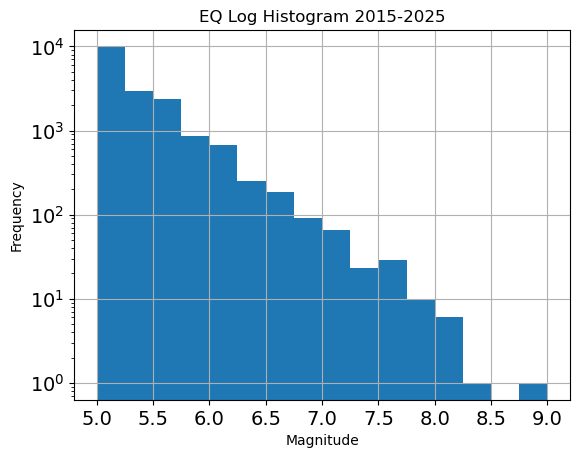

In [37]:
bin_width=10
bin_list = np.linspace(5, 9, 17)
print(bin_list)

plt.hist(EQ_data['mag'], log=True, label='mag', bins=bin_list)
plt.title('EQ Log Histogram 2015-2025')
plt.ylabel('Frequency')
plt.xlabel('Magnitude')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

## Plot histogram of Earthquake Depths

Let's see the range and frequency of depths where earthquakes occur. **_Make a histogram of earthquake depth_**

<font color=goldenrod>**_Code for you to write_**</font>

[  0.  50. 100. 150. 200. 250. 300. 350. 400. 450. 500. 550. 600. 650.
 700.]


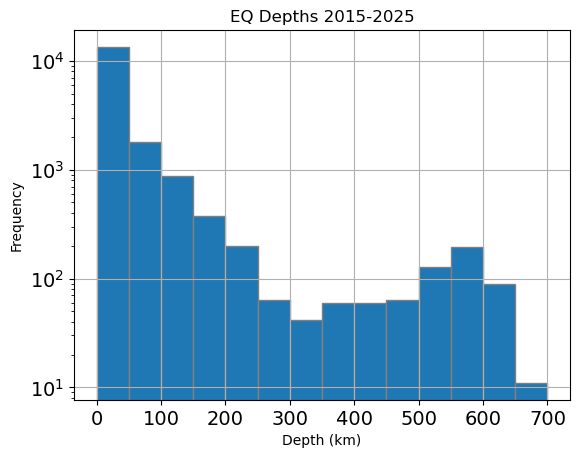

In [38]:
bin_width=10
bin_list = np.linspace(0, 700, 15)
print(bin_list)

plt.hist(EQ_data['depth'], log=True, label='depth', bins=bin_list, edgecolor='grey')
plt.title('EQ Depths 2015-2025')
plt.ylabel('Frequency')
plt.xlabel('Depth (km)')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

<font color=darkred>**_Discussion Question:_**</font> **_At what depth are the majority of earthquakes? How deep do they extend? How does that compare to the typical depth of the lithosphere (~100 km)?_**

In [39]:
EQ_data.describe()


latitude     longitude         depth          mag          nst  \
count  17351.000000  17351.000000  17351.000000  17351.00000  5941.000000   
mean      -2.377524     34.170483     52.471756      5.33150   112.748864   
std       31.428689    123.715695    102.759036      0.40263    61.627125   
min      -69.773900   -179.989700     -1.010000      5.00000     6.000000   
25%      -22.928750    -73.215700     10.000000      5.00000    70.000000   
50%       -5.572400     93.997300     11.000000      5.20000   102.000000   
75%       19.731200    142.820450     45.000000      5.50000   138.000000   
max       87.386000    179.998100    670.810000      8.80000   619.000000   

                gap          dmin           rms  horizontalError  \
count  17214.000000  17206.000000  17351.000000     17235.000000   
mean      61.383444      4.260301      0.814598         7.657998   
std       34.935236      5.185231      0.229836         2.420647   
min        8.000000      0.000000      0.060000         0.080000   
25%       35.000000      1.287250      0.650000         6.100000   
50%       54.000000      2.547500      0.800000         7.600000   
75%       79.000000      5.111000      0.960000         9.200000   
max      340.000000     41.046000      2.820000        21.100000   

         depthError      magError        magNst  
count  17351.000000  16247.000000  16344.000000  
mean       2.888546      0.065952     76.524596  
std        1.863902      0.026163    105.590328  
min        0.000000      0.000000      0.000000  
25%        1.800000      0.049000     20.000000  
50%        1.900000      0.063000     39.000000  
75%        4.000000      0.080000     84.000000  
max       32.570000      0.563000   1027.000000

In [41]:
# EQ_data.corr(EQ_data['mag', 'depth'])

## Map of Earthquake Epicenters

Now let's plot the epicenters of the earthquakes on a Plate Carree projection. Replace the `___`s with longitude and latitude in order to make the map.

<font color=goldenrod>**_Code for you to write_**</font>

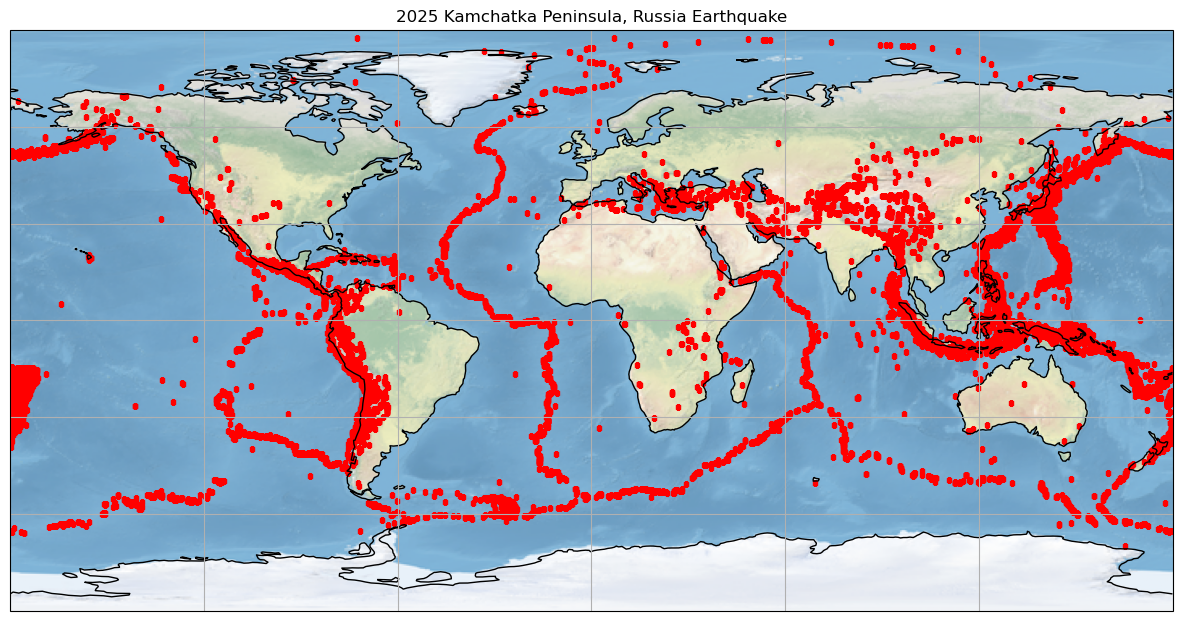

In [42]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

plt.scatter(EQ_data['longitude'],EQ_data['latitude'],color='red',marker='s',s=10,transform=ccrs.PlateCarree())

plt.title('2025 Kamchatka Peninsula, Russia Earthquake')
ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

## Small Group Discussion

Get into groups of three and discuss these questions while inspecting your maps:

**_Where do the majority of earthquakes occur?_**

**_What do those locations correspond with?_**

**_What properties of these earthquakes should we investigate to learn more about the nature of plate tectonics in different places?_**

_Write a summary of your discussion here._

## Maps of Earthquake Depth

The map we made above is nice, but it doesn't tell us everything about our data such as the depth of the earthquakes. Let's color code the earthquakes by depth when we map them.

To do this, use the same `plt.scatter()` function, but add the option to set the color by depth. You can do this by having  `c=EQ_data['depth']` within the function. You can customize the output by setting the minimum value for the color bar `vmin=0` and the maximum value `vmax=200`. You can also customize the colormap. A perceptually uniform sequential color map like `cmap='magma_r'` or `cmap='viridis'` works well (https://matplotlib.org/tutorials/colors/colormaps.html). I think it also is nice to make the points partially see through by setting `alpha=0.5`. All of these customizations can be made by adding these arguments within the `plt.scatter()` function.

<font color=goldenrod>**_Code for you to write_**</font>

Make a map that colors points by depth by inserting these arguments in the plt.scatter() function in the code block below.

<>:7: SyntaxWarning: invalid escape sequence '\g'
<>:7: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_192533/1438366304.py:7: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f'Earthquakes $\geq$ 5.0 from 2015-2025')
/opt/tljh/user/lib/python3.12/site-packages/matplotlib/collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/opt/tljh/user/lib/python3.12/site-packages/matplotlib/collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/opt/tljh/user/lib/python3.12/site-packages/matplotlib/collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


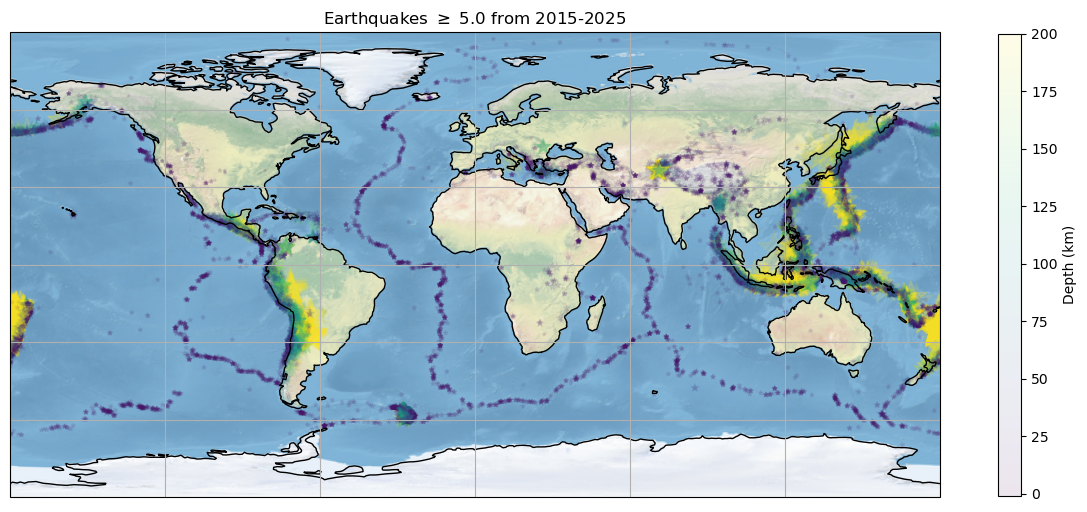

In [43]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

plt.scatter(EQ_data['longitude'],EQ_data['latitude'], EQ_data['depth'],c=EQ_data['depth'],alpha=0.1,vmax=200, cmap='viridis', marker='*',transform=ccrs.PlateCarree())

plt.title(f'Earthquakes $\geq$ 5.0 from 2015-2025')
ax.coastlines()
ax.stock_img()
ax.gridlines()
plt.colorbar(label='Depth (km)', shrink=0.4)

plt.show()

<font color=darkred>**_Discussion question:_**</font> **_At what depth do earthquakes occur at mid-ocean ridges?_**

The earthquakes at trenches (like around the Pacific ocean's 'ring of fire') get deeper in a systematic way. The deepest earthquakes are the farthest from the trench. This reveals the location of the downgoing slabs.

<img src="slab_eq.png">
A cross-section through a subduction zone. Red points are earthquake focus points. The most active region is the zone of contact between the plates. There is a back-arc seismic zone in the overriding plate. Below ~70 km depth earthquakes occur within the subducting plate, this region is call the Wadati-Benioff seosmic zone.

<font color=darkred>**_Discussion question:_**</font> **_What direction is subduction occuring below South America? Japan?_**

## Andean subduction 

Let's look at a subset of this earthquake catalog across the Andes in South America. The code below is filtering the data frame to only include those between 20ºS and 25ºS latitude and 75ºW and 60ºW longitude.

In [44]:
selected_quakes = EQ_data[(EQ_data['latitude']>-25)&(EQ_data['latitude']<-20)
                          &(EQ_data['longitude']> -75)&(EQ_data['longitude']< -60)]
selected_quakes.head()

time  latitude  longitude    depth  mag magType  \
49   2024-07-19T01:50:48.571Z  -23.0791   -67.8404  127.291  7.4     mww   
201  2022-05-10T23:06:32.368Z  -23.4960   -66.6519  220.000  6.8     mww   
210  2020-06-03T07:35:36.466Z  -23.2740   -68.4677  112.000  6.8     mww   
218  2018-04-02T13:40:34.840Z  -20.6588   -63.0058  559.000  6.8     mww   
434  2023-03-22T16:00:34.663Z  -23.4224   -66.4954  228.000  6.4     mww   

       nst   gap   dmin   rms  ...                   updated  \
49   119.0  19.0  0.336  1.06  ...  2025-08-09T00:59:07.321Z   
201  162.0  30.0  1.505  0.87  ...  2022-08-12T11:38:28.703Z   
210    NaN  21.0  1.164  1.13  ...  2022-03-10T05:19:04.598Z   
218    NaN  16.0  5.320  0.99  ...  2022-05-03T19:08:58.878Z   
434  249.0  23.0  1.618  0.91  ...  2024-10-09T17:29:43.182Z   

                                                 place        type  \
49            41 km ESE of San Pedro de Atacama, Chile  earthquake   
201  86 km NNW of San Antonio de los Cobres, Argentina  earthquake   
210            48 km SW of San Pedro de Atacama, Chile  earthquake   
218                       38 km SE of Boyuibe, Bolivia  earthquake   
434                 86 km WSW of El Aguilar, Argentina  earthquake   

    horizontalError depthError  magError  magNst    status  locationSource  \
49             7.08      3.027     0.026   144.0  reviewed              us   
201            9.40      1.900     0.062    25.0  reviewed              us   
210            6.80      1.800     0.046    45.0  reviewed              us   
218            6.70      1.900     0.047    43.0  reviewed              us   
434            8.26      1.855     0.044    50.0  reviewed              us   

    magSource  
49         us  
201        us  
210        us  
218        us  
434        us  

[5 rows x 22 columns]

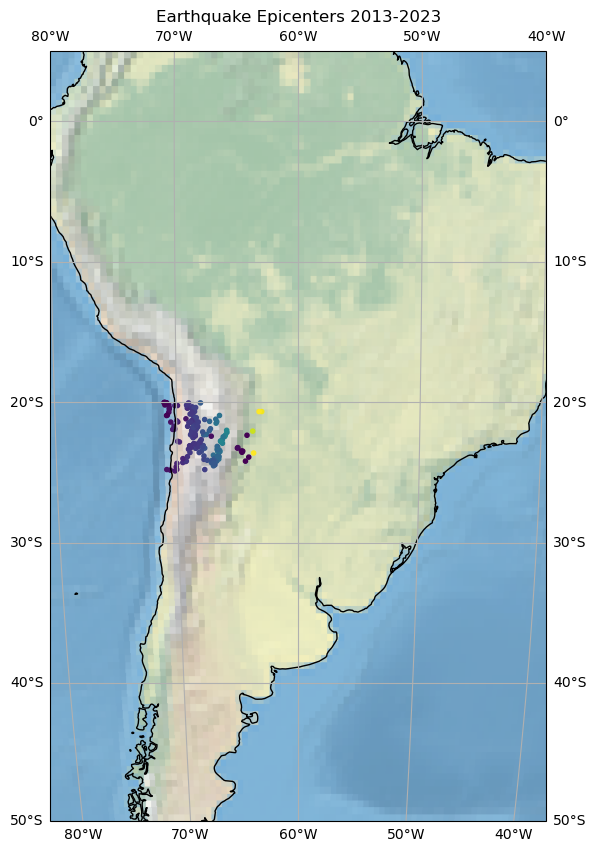

In [45]:
plt.figure(1,(10,10)) # make a big figure 
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60))
ax.set_extent([-80, -40, -50, 5], crs=ccrs.PlateCarree())

plt.scatter(selected_quakes['longitude'],selected_quakes['latitude'],marker='.',
            c=selected_quakes['depth'],transform=ccrs.PlateCarree())

plt.title('Earthquake Epicenters 2013-2023')
ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)

plt.show()

Let's take all of the earthquakes within that region and plot earthquake depth on the y-axis and earthquake location on the x-axis. **Labeling axes is super important in science! Don't make plots without labeled axes!**

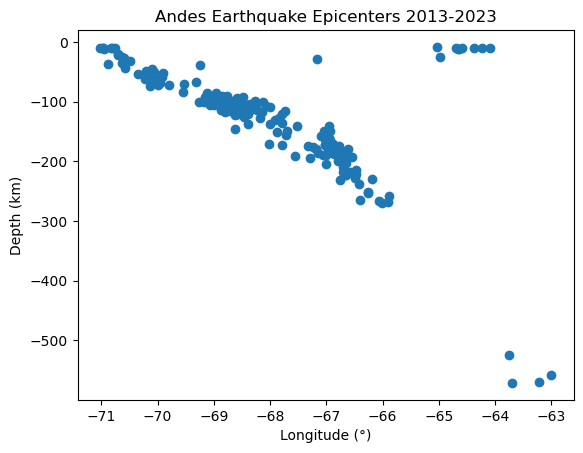

In [46]:
plt.scatter(selected_quakes['longitude'],-1*selected_quakes['depth'])
plt.title('Andes Earthquake Epicenters 2013-2023')
plt.xlabel('Longitude (°)')
plt.ylabel('Depth (km)')
plt.show()

## Pick and plot one other location of interest

Filter the earthquake catalog by a latitude and longitude range like we did above the South America example. Plot the earthquakes on a map and make a similar depth vs. longitude plot (or depth vs latitude plot) for another region.

<font color=goldenrod>**_Code for you to write_**</font>

In [50]:
# 34.048868, 27.913392
selected_quakes = EQ_data[(EQ_data['latitude']>30)&(EQ_data['latitude']<40)
                          &(EQ_data['longitude']>20)&(EQ_data['longitude']<35)]
selected_quakes

time  latitude  longitude  depth  mag magType  nst  \
135    2020-10-30T11:51:27.348Z   37.8973    26.7838  21.00  7.0     mww  NaN   
215    2018-10-25T22:54:52.630Z   37.5203    20.5565  14.00  6.8     mww  NaN   
302    2022-01-11T01:07:48.064Z   35.2267    31.9435  21.00  6.6     mww  NaN   
335    2017-07-20T22:31:11.260Z   36.9293    27.4139   7.00  6.6     mww  NaN   
374    2015-11-17T07:10:07.300Z   38.6700    20.6000  11.00  6.5     mww  NaN   
...                         ...       ...        ...    ...  ...     ...  ...   
16874  2016-10-16T00:09:58.160Z   39.7659    20.7143  10.00  5.0      mb  NaN   
16885  2016-09-28T07:17:35.820Z   36.7738    21.9120  46.53  5.0      mb  NaN   
16948  2016-04-16T00:10:41.290Z   34.9371    25.7577  10.00  5.0     mwr  NaN   
17050  2016-01-10T17:40:49.510Z   39.5649    34.3373  10.00  5.0     mwr  NaN   
17280  2019-01-10T18:24:41.280Z   34.5801    26.6262  36.37  5.0      mb  NaN   

        gap   dmin   rms  ...                   updated  \
135    18.0  1.518  0.59  ...  2025-09-03T14:13:09.680Z   
215    15.0  2.268  0.82  ...  2022-05-03T19:36:42.091Z   
302    21.0  1.168  0.71  ...  2022-06-08T04:06:23.087Z   
335    16.0  0.913  0.78  ...  2023-05-16T18:42:35.068Z   
374     NaN    NaN  0.98  ...  2022-08-01T18:14:50.537Z   
...     ...    ...   ...  ...                       ...   
16874  38.0  0.709  0.79  ...  2017-01-15T01:13:54.040Z   
16885  66.0  0.404  0.83  ...  2016-12-14T03:17:54.040Z   
16948  42.0  0.792  0.72  ...  2022-05-03T18:51:25.395Z   
17050  42.0  0.562  0.85  ...  2022-08-07T08:46:20.255Z   
17280  43.0  1.059  1.20  ...  2019-04-02T20:51:02.040Z   

                                       place        type horizontalError  \
135    13 km NNE of Néon Karlovásion, Greece  earthquake             1.4   
215             32 km SW of Lithakiá, Greece  earthquake             4.9   
302               48 km WNW of Pólis, Cyprus  earthquake             4.8   
335                 11 km ENE of Kos, Greece  earthquake             4.3   
374             19 km SSW of Lefkáda, Greece  earthquake             4.6   
...                                      ...         ...             ...   
16874          6 km S of Asprángeloi, Greece  earthquake             4.5   
16885             4 km WSW of Koróni, Greece  earthquake             6.8   
16948            8 km S of Ierápetra, Greece  earthquake             7.1   
17050             13 km SW of Yerköy, Turkey  earthquake             3.7   
17280        76 km SSE of Palekastro, Greece  earthquake             6.4   

      depthError  magError  magNst    status  locationSource magSource  
135          1.8     0.036    75.0  reviewed              us        us  
215          1.7     0.043    51.0  reviewed              us        us  
302          1.7     0.045    47.0  reviewed              us        us  
335          1.7     0.058    29.0  reviewed              us        us  
374          3.0       NaN     NaN  reviewed             ath        us  
...          ...       ...     ...       ...             ...       ...  
16874        1.8     0.051   124.0  reviewed              us        us  
16885        7.9     0.045   159.0  reviewed              us        us  
16948        1.9     0.050    39.0  reviewed              us        us  
17050        1.4     0.053    34.0  reviewed              us        us  
17280        6.5     0.050   129.0  reviewed              us        us  

[177 rows x 22 columns]

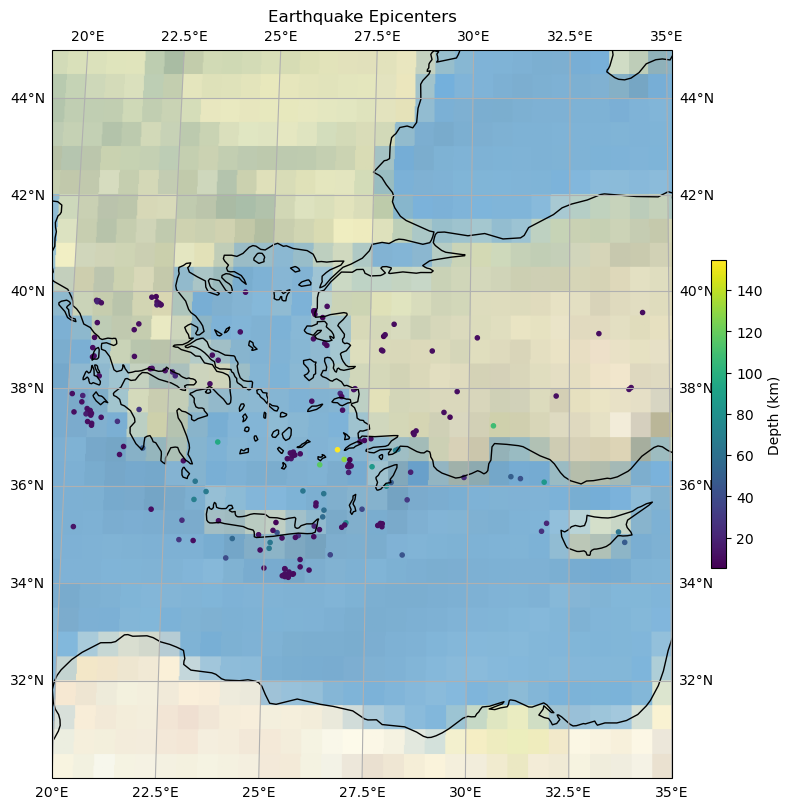

In [61]:
plt.figure(1,(10,10)) # make a big figure 
ax = plt.axes(projection=ccrs.Robinson(central_longitude=33))
ax.set_extent([20, 35, 30, 45], crs=ccrs.PlateCarree())

plt.scatter(selected_quakes['longitude'],selected_quakes['latitude'],marker='.',
            c=selected_quakes['depth'], label='depth',transform=ccrs.PlateCarree())

plt.title('Earthquake Epicenters')
ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)
plt.colorbar(label='Depth (km)', shrink=0.4)

plt.show()

**You can take some time to explore different regions. We will then have a couple people come up and write the code to plot earthquake depths in other regions.**

### Turn in this notebook

Save your completed notebook, print the file to PDF, and upload the PDF on Blackboard.